
Exploratory Data Analysis & Intro
Goal

    1.Investigate top-paying roles and skills in the data science industry.
    2.Use Python to explore a real-live dataset on job postings.
    3.For job-seekers: use these insights to help find the best job opportunities.

Final Deliverables:

    1.Create Jupyter Notebookss (showcasing core skills in Python).
    2.Create a summary page (via README.md) capturing your findings.
    3.Share this project via GitHub & LinkedIn.

Questions to Answer

    1.What are the most demanded skills for the top 3 most popular data roles?
    2.How are in-demand skills trending for Data Analysts?
    3.How well do jobs and skills pay for Data Analysts?
    4.What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)


Exploratory Data Analysis

Roles to Explore:

In [1]:
#importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x)else x)


c:\Users\siddh\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Filter for INDIA Data Analyst Roles

In [2]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

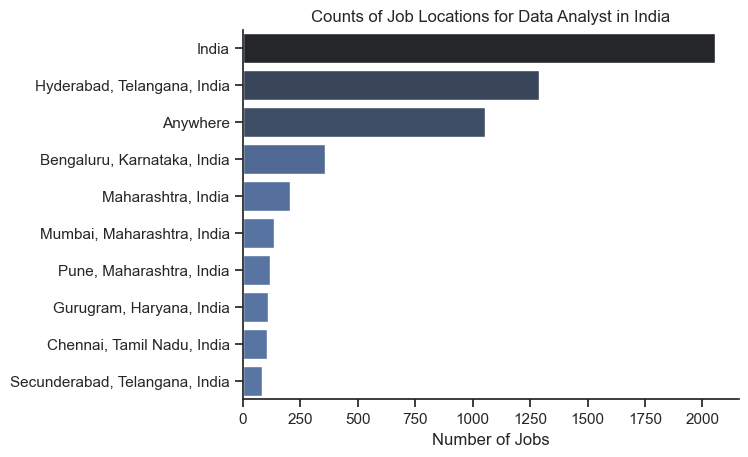

In [15]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()

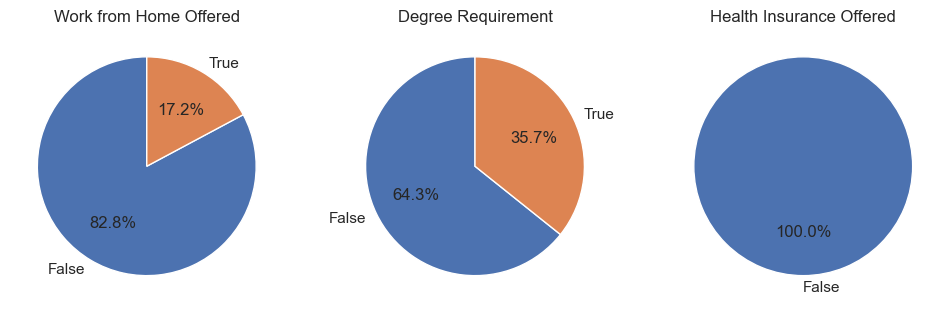

In [33]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_India[column].value_counts()
    labels = counts.index.astype(str)           # dynamic labels based on actual unique values
    
    ax[i].pie(counts, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)

plt.show()


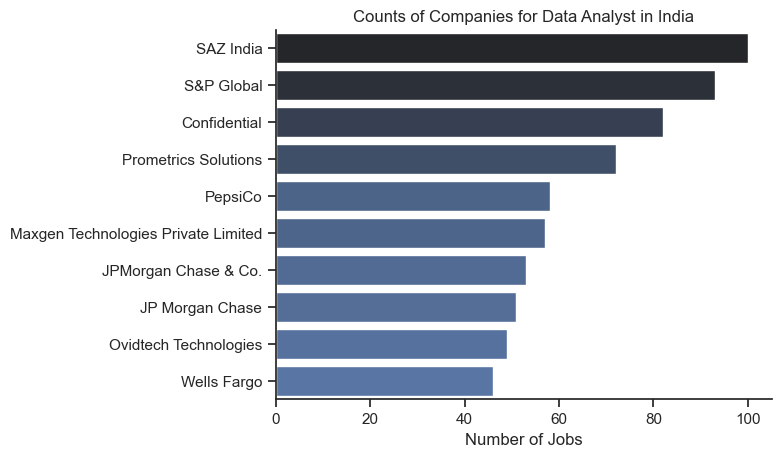

In [34]:
df_plot = df_DA_India['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel("")
plt.show()